In [25]:
import pandas as pd
import os

database_path = "/mnt/L-HDD/try/"

beatmaps_csv = os.path.join(database_path, "beatmaps.csv")
hit_objects_csv = os.path.join(database_path, "hit_objects.csv")
time_points_csv = os.path.join(database_path, "timing_points.csv")

beatmaps_df = pd.read_csv(beatmaps_csv, parse_dates=["ranked_date"])
hit_objects_df = pd.read_csv(hit_objects_csv)
time_points_df = pd.read_csv(time_points_csv)

In [34]:
beatmaps_df[beatmaps_df["ID"] == "1000309-3"]

,ID,Title,Artist,Creator,Version,HPDrainRate,CircleSize,OverallDifficulty,ApproachRate,SliderMultiplier,SliderTickRate,beatmap_id,ranked_date
3849,1000309-3,If You Can't Hang,Sleeping With Sirens,attendant,Normal,3.0,3.0,4.0,5.5,2.0,1.0,1000309,2019-12-02 11:03:51+00:00


# VISUALIZE

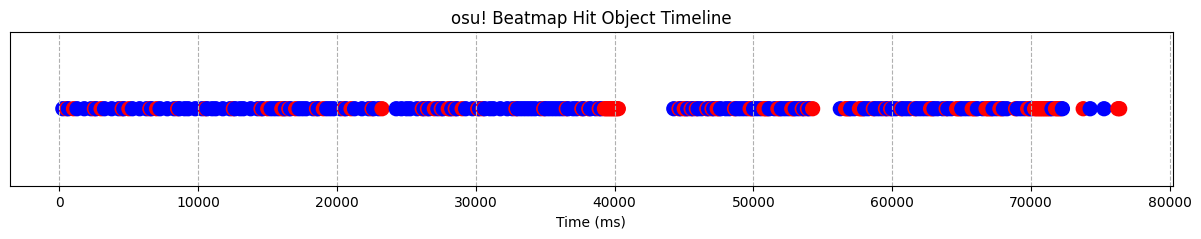

In [21]:
import matplotlib.pyplot as plt

example_df = df = hit_objects_df[hit_objects_df["ID"] == "2269930-0"].copy()
example_df["Color"] = example_df["Type"].apply(lambda t: "blue" if t == "slider" else "red")

plt.figure(figsize=(15, 2))
plt.scatter(example_df["Time"], [1] * len(example_df), c=example_df["Color"], s=100, label="Hit Objects")

plt.yticks([])
plt.xlabel("Time (ms)")
plt.title("osu! Beatmap Hit Object Timeline")
plt.grid(axis="x", linestyle="--")
plt.show()

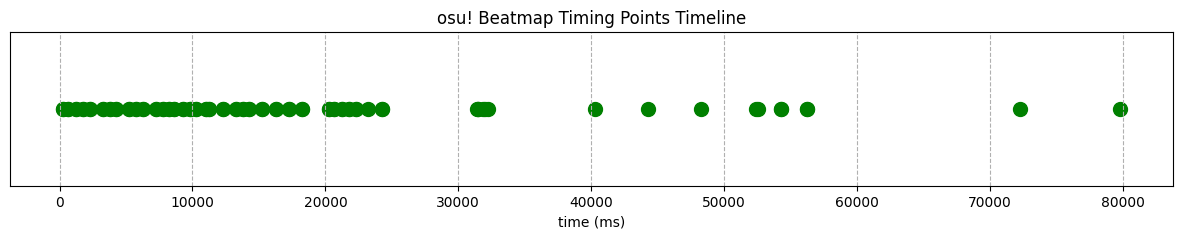

In [59]:
import matplotlib.pyplot as plt

example_t_df = df = time_points_df[time_points_df["ID"] == "2269930-0"].copy()

plt.figure(figsize=(15, 2))
plt.scatter(example_t_df["time"], [1] * len(example_t_df), c="green", s=100, label="Timing Points")

plt.yticks([])
plt.xlabel("time (ms)")
plt.title("osu! Beatmap Timing Points Timeline")
plt.grid(axis="x", linestyle="--",)
plt.show()

# Format

In [37]:
a = time_points_df[time_points_df["uninherited"] == 0]
a[a["time"] < 0].head()

,ID,time,beat_length,meter,sample_set,volume,uninherited,effects,beatmap_id
21578,2128122-1,-18.0,-100.000000,4,2,50,0.0,0.0,2128122
21609,2128122-2,-18.0,-125.000000,4,2,50,0.0,0.0,2128122
21640,2128122-3,-18.0,-166.666667,4,2,50,0.0,0.0,2128122
270387,721804-1,-25.0,-142.857143,4,2,80,0.0,0.0,721804
303769,2252729-0,-15.0,-100.000000,4,2,80,0.0,0.0,2252729


In [38]:
# For each time, there is maximum 2 timing points
b = time_points_df
b['time_count'] = b.groupby(['ID', 'time'])['time'].transform('count')
display(b[b['time_count'] > 1].drop(columns=['time_count']))
b.drop(columns=['time_count'], inplace=True)

,ID,time,beat_length,meter,sample_set,volume,uninherited,effects,beatmap_id
0,1509063-0,3581.0,344.827586,4,3,60,1.0,0.0,1509063
1,1509063-0,3581.0,-108.695652,4,3,60,0.0,0.0,1509063
219,1509063-2,3581.0,344.827586,4,3,60,1.0,0.0,1509063
220,1509063-2,3581.0,-111.111111,4,3,60,0.0,0.0,1509063
356,1509063-3,3581.0,344.827586,4,3,60,1.0,0.0,1509063
...,...,...,...,...,...,...,...,...,...
973657,2260460-0,2700.0,-117.647059,4,2,55,0.0,0.0,2260460
973665,2260460-1,2700.0,937.500000,4,2,55,1.0,0.0,2260460
973666,2260460-1,2700.0,-117.647059,4,2,55,0.0,0.0,2260460
973674,2260460-2,2700.0,937.500000,4,2,55,1.0,0.0,2260460


slider velocity: -1000 -> 0.1x | -10 -> 10x

In [39]:
time_points_df

,ID,time,beat_length,meter,sample_set,volume,uninherited,effects,beatmap_id
0,1509063-0,3581.0,344.827586,4,3,60,1.0,0.0,1509063
1,1509063-0,3581.0,-108.695652,4,3,60,0.0,0.0,1509063
2,1509063-0,4529.0,-108.695652,4,3,5,0.0,0.0,1509063
3,1509063-0,4615.0,-108.695652,4,3,60,0.0,0.0,1509063
4,1509063-0,5908.0,-108.695652,4,3,5,0.0,0.0,1509063
...,...,...,...,...,...,...,...,...,...
973678,2260460-2,62700.0,-83.333333,4,2,85,0.0,1.0,2260460
973679,2260460-2,76762.0,-83.333333,4,2,85,0.0,0.0,2260460
973680,2260460-2,77700.0,-83.333333,4,2,85,0.0,1.0,2260460
973681,2260460-2,96450.0,-100.000000,4,2,70,0.0,0.0,2260460


In [40]:
hit_objects_df

,ID,Time,Type,X,Y,HitSound,Extra,beatmap_id,beat_length,meter,slider_velocity,sample_set,volume,effects
0,1509063-0,3580,slider,135,26,0,B|181:10|217:45|225:69|225:69|235:91|271:132|3...,1509063,NaN,NaN,NaN,NaN,NaN,NaN
1,1509063-0,4270,slider,385,75,0,P|349:124|353:174,1509063,NaN,NaN,NaN,NaN,NaN,NaN
2,1509063-0,4615,circle,365,204,0,0,1509063,NaN,NaN,NaN,NaN,NaN,NaN
3,1509063-0,4787,circle,365,204,0,0,1509063,NaN,NaN,NaN,NaN,NaN,NaN
4,1509063-0,5132,circle,414,371,0,0,1509063,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5253029,2260460-2,94575,slider,6,214,0,B|21:119|60:174|78:63,2260460,NaN,NaN,NaN,NaN,NaN,NaN
5253030,2260460-2,95512,circle,254,122,4,0,2260460,NaN,NaN,NaN,NaN,NaN,NaN
5253031,2260460-2,95981,circle,193,260,4,0,2260460,NaN,NaN,NaN,NaN,NaN,NaN
5253032,2260460-2,96450,circle,90,214,4,0,2260460,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# new_columns = ["beat_length", "meter", "slider_velocity", "sample_set", "volume", "effects"]

# for new_column in new_columns:
#     hit_objects_df[new_column] = ''
# hit_objects_df.to_csv("/home/saliherdemk/try/hit_objects.csv", index=False)

In [1]:
def get_timing_attributes(row):
    beatmap_id = row["ID"]
    target_time = row["Time"]
    base_velocity = float(beatmaps_df.loc[beatmaps_df["ID"] == beatmap_id, "SliderMultiplier"].iloc[0])
    beatmap_time_points = time_points_df[time_points_df["ID"] == beatmap_id]
    
    df_filtered = beatmap_time_points[beatmap_time_points["time"] <= target_time]
    
    latest_uninherited = df_filtered[df_filtered["uninherited"] == 1.0]
    if not latest_uninherited.empty:
        latest_uninherited = latest_uninherited.loc[latest_uninherited["time"].idxmax()]
    else:
        first_uninherited = beatmap_time_points[beatmap_time_points["uninherited"] == 1.0]
        latest_uninherited = first_uninherited.iloc[0]
        
    
    latest_inherited = df_filtered[df_filtered["uninherited"] == 0.0]
    latest_inherited = latest_inherited.loc[latest_inherited["time"].idxmax()] if not latest_inherited.empty else None
    
    beat_length = latest_uninherited["beat_length"]
    meter = latest_uninherited["meter"]
    slider_velocity = latest_inherited["beat_length"] if latest_inherited is not None else -100 * base_velocity
    sample_set = latest_inherited["sample_set"] if latest_inherited is not None else 1
    volume = latest_inherited["volume"] if latest_inherited is not None else 60
    effects = latest_inherited["effects"] if latest_inherited is not None else 0

    return {
            "beat_length": beat_length,
            "meter": meter,
            "slider_velocity": slider_velocity,
            "sample_set": sample_set,
            "volume": volume,
            "effects": effects
        
    }


In [2]:
def process_chunk(start_index, end_index, hit_objects_df, checkpoint_file):
    chunk_df = hit_objects_df[start_index: end_index]
    
    timing_list = Parallel(n_jobs=-1)(delayed(get_timing_attributes)(row) for _, row in tqdm(chunk_df.iterrows(), desc=f"Processing rows {start_index}-{end_index}", total=len(chunk_df)))
    timing_df = pd.DataFrame(timing_list).apply(pd.Series)
    
    print("Saving...")
    update_indices = chunk_df.index
    hit_objects_df.loc[update_indices, ["beat_length", "meter", "slider_velocity", "sample_set", "volume", "effects"]] = timing_df.values
    hit_objects_df.to_csv(checkpoint_file, index=False)

In [9]:
from joblib import Parallel, delayed
from tqdm.notebook import tqdm
import os
import pandas as pd

checkpoint_file = "/home/saliherdemk/try/checkpoint/hit_objects.csv"

start_index = 0
chunk_size = 100000

if os.path.exists(checkpoint_file):
    checkpoint_df = pd.read_csv(checkpoint_file)
    start_index = checkpoint_df[checkpoint_df["beat_length"].isna()].index.min()
    print("Resume from index", start_index)
end_index = start_index + chunk_size

while(end_index < len(checkpoint_df)):
    process_chunk(start_index, end_index, checkpoint_df, checkpoint_file)
    
    start_index = end_index
    end_index = start_index + chunk_size

process_chunk(start_index, len(checkpoint_df), checkpoint_df, checkpoint_file)


Resume from index 1201000


Processing rows 1201000-1301000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 1301000-1401000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 1401000-1501000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 1501000-1601000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 1601000-1701000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 1701000-1801000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 1801000-1901000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 1901000-2001000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 2001000-2101000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 2101000-2201000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 2201000-2301000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 2301000-2401000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 2401000-2501000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 2501000-2601000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 2601000-2701000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 2701000-2801000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 2801000-2901000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 2901000-3001000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 3001000-3101000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 3101000-3201000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 3201000-3301000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 3301000-3401000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 3401000-3501000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 3501000-3601000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 3601000-3701000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 3701000-3801000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 3801000-3901000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 3901000-4001000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 4001000-4101000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 4101000-4201000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 4201000-4301000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 4301000-4401000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 4401000-4501000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 4501000-4601000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 4601000-4701000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 4701000-4801000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 4801000-4901000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 4901000-5001000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 5001000-5101000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 5101000-5201000:   0%|          | 0/100000 [00:00<?, ?it/s]

Saving...


Processing rows 5201000-5253034:   0%|          | 0/52034 [00:00<?, ?it/s]

Saving...


In [55]:
example_hit_objects = pd.concat([example_hit_objects, timing_df], axis=1)
example_hit_objects

,ID,Time,Type,X,Y,HitSound,Extra,beatmap_id,beat_length,meter,slider_velocity,sample_set,volume,effects
0,1509063-0,3580,slider,135,26,0,B|181:10|217:45|225:69|225:69|235:91|271:132|3...,1509063,344.827586,4.0,-142.000000,1.0,60.0,0.0
1,1509063-0,4270,slider,385,75,0,P|349:124|353:174,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0
2,1509063-0,4615,circle,365,204,0,0,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0
3,1509063-0,4787,circle,365,204,0,0,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0
4,1509063-0,5132,circle,414,371,0,0,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,1509063-0,244270,slider,170,68,0,P|177:103|182:139,1509063,344.827586,4.0,-98.039216,3.0,90.0,1.0
599,1509063-0,244615,circle,120,188,2,0,1509063,344.827586,4.0,-98.039216,3.0,90.0,1.0
600,1509063-0,244787,slider,120,188,0,P|65:146|-9:169,1509063,344.827586,4.0,-98.039216,3.0,90.0,1.0
601,1509063-0,245649,slider,9,378,0,L|22:306,1509063,344.827586,4.0,-98.039216,3.0,90.0,1.0


# MFCC

In [11]:
import pandas as pd
import numpy as np
import os

database_path = "/mnt/L-HDD/try/"
audio_path = "/mnt/L-HDD/post_2010_dataset/audio/"

formatted_csv = os.path.join(database_path, "hit-object_formatted.csv")
formatted_df = pd.read_csv(formatted_csv)
formatted_df = formatted_df[formatted_df["ID"] != "40233-6"]

In [12]:
formatted_df["Time_sec"] = formatted_df["Time"] / 1000
formatted_df

,ID,Time,Type,X,Y,HitSound,Extra,beatmap_id,beat_length,meter,slider_velocity,sample_set,volume,effects,Time_sec
0,1509063-0,3580,slider,135,26,0,B|181:10|217:45|225:69|225:69|235:91|271:132|3...,1509063,344.827586,4.0,-142.000000,1.0,60.0,0.0,3.580
1,1509063-0,4270,slider,385,75,0,P|349:124|353:174,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0,4.270
2,1509063-0,4615,circle,365,204,0,0,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0,4.615
3,1509063-0,4787,circle,365,204,0,0,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0,4.787
4,1509063-0,5132,circle,414,371,0,0,1509063,344.827586,4.0,-108.695652,3.0,60.0,0.0,5.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5253029,2260460-2,94575,slider,6,214,0,B|21:119|60:174|78:63,2260460,937.500000,4.0,-83.333333,2.0,85.0,1.0,94.575
5253030,2260460-2,95512,circle,254,122,4,0,2260460,937.500000,4.0,-83.333333,2.0,85.0,1.0,95.512
5253031,2260460-2,95981,circle,193,260,4,0,2260460,937.500000,4.0,-83.333333,2.0,85.0,1.0,95.981
5253032,2260460-2,96450,circle,90,214,4,0,2260460,937.500000,4.0,-100.000000,2.0,70.0,0.0,96.450


In [30]:
import librosa
from tqdm import tqdm
from joblib import Parallel, delayed

tqdm.pandas()

def get_time_attributes(series):
    audio_folder = os.path.join(audio_path, str(series["beatmap_id"].iloc[0]))
    audio_file = os.path.join(audio_folder, os.listdir(audio_folder)[0])
    y, sr = librosa.load(audio_file)
    
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    beat_times = librosa.frames_to_time(beat_frames, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    rms_energy = librosa.feature.rms(y=y)

    aligned_objects = []
    matched_mfccs = []
    matched_rms = []
    for time in series['Time_sec']:
        closest_beat = min(beat_times, key=lambda x: abs(x - time))
        aligned_objects.append(closest_beat)

        frame = librosa.time_to_frames(time, sr=sr)
        matched_mfccs.append(mfcc[:, frame])
        matched_rms.append(rms_energy[0][frame])
    series['Aligned_Time'] = aligned_objects
    series['MFCC'] = matched_mfccs
    series['RMS'] = matched_rms

    return series

grouped = list(formatted_df[formatted_df["ID"] == "1000309-3"].groupby("ID"))

results = Parallel(n_jobs=-1, backend="multiprocessing")(
    delayed(get_time_attributes)(group) for _, group in tqdm(grouped, desc="Processing Groups")
)

result = pd.concat(results)

Processing Groups: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.14s/it]


In [33]:
result[result["Time"] > 30000]

,ID,Time,Type,X,Y,HitSound,Extra,beatmap_id,beat_length,meter,slider_velocity,sample_set,volume,effects,Time_sec,Aligned_Time,MFCC,RMS
1993861,1000309-3,30103,circle,92,371,4,0,1000309,312.5,4.0,-200.0,2.0,40.0,0.0,30.103,30.162721,"[15.875461, 86.10722, -26.242254, 62.009705, -...",0.330499
1993862,1000309-3,47603,slider,58,45,0,L|47:159,1000309,312.5,4.0,-200.0,2.0,40.0,0.0,47.603,47.670567,"[-28.431784, 125.40363, -35.15642, 34.7034, 4....",0.317004
1993863,1000309-3,48228,slider,132,178,0,L|141:78,1000309,312.5,4.0,-200.0,2.0,40.0,0.0,48.228,48.274286,"[9.7221155, 106.652435, -21.313652, 28.09032, ...",0.331165
1993864,1000309-3,48853,slider,224,112,0,L|214:211,1000309,312.5,4.0,-200.0,2.0,40.0,0.0,48.853,48.924444,"[2.2682936, 72.052536, 19.84988, 47.45574, 3.4...",0.277919
1993865,1000309-3,49478,circle,299,239,4,0,1000309,312.5,4.0,-200.0,2.0,40.0,0.0,49.478,49.551383,"[35.77508, 74.760414, -4.700391, 21.590057, -5...",0.329611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994232,1000309-3,242603,slider,106,132,0,L|95:249,1000309,312.5,4.0,-200.0,2.0,40.0,0.0,242.603,242.346667,"[-60.93889, 57.523926, 5.0644245, 41.27786, 2....",0.144582
1994233,1000309-3,243228,slider,142,308,0,L|241:317,1000309,312.5,4.0,-200.0,2.0,40.0,0.0,243.228,242.973605,"[-27.457378, 4.902238, 3.795202, 17.961609, 12...",0.155960
1994234,1000309-3,243853,slider,318,272,0,L|327:172,1000309,312.5,4.0,-200.0,2.0,40.0,0.0,243.853,243.600544,"[-60.0897, 76.708405, -44.444244, 54.024612, -...",0.172484
1994235,1000309-3,244478,slider,282,96,0,L|182:86,1000309,312.5,4.0,-200.0,2.0,40.0,0.0,244.478,244.738322,"[-16.158718, 11.865596, 7.7639976, 12.802651, ...",0.169470


In [ ]:
result.to_csv(os.path.join(database_path, "audio_features.csv"),index = False)


In [7]:
result.head()

,ID,Time,Type,X,Y,HitSound,Extra,beatmap_id,beat_length,meter,slider_velocity,sample_set,volume,effects,Time_sec,Aligned_Time,MFCC,RMS
1991334,1000309-0,4790,spinner,256,192,8,7290,1000309,312.5,4.0,-200.0,1.0,60.0,0.0,4.790,4.852971,"[-156.50563, 60.66174, 23.162014, 36.043022, 1...",0.115713
1991335,1000309-0,7603,circle,104,34,0,0,1000309,312.5,4.0,-200.0,1.0,60.0,0.0,7.603,7.360726,"[-214.92702, 79.36589, 10.693358, 30.233, 0.57...",0.027196
1991336,1000309-0,7759,circle,171,1,0,0,1000309,312.5,4.0,-200.0,1.0,60.0,0.0,7.759,7.964444,"[-195.96455, 86.076096, 20.589142, 11.64809, 9...",0.063843
1991337,1000309-0,7915,circle,243,85,8,0,1000309,312.5,4.0,-100.0,2.0,40.0,0.0,7.915,7.964444,"[-187.26198, 87.61224, 16.888044, 26.756334, 3...",0.096224
1991338,1000309-0,8071,circle,78,34,8,0,1000309,312.5,4.0,-100.0,2.0,40.0,0.0,8.071,7.964444,"[-121.31896, 74.76173, 10.7497425, 29.527971, ...",0.136511


In [9]:
result.isna().sum()

ID                 0
Time               0
Type               0
X                  0
Y                  0
HitSound           0
Extra              0
beatmap_id         0
beat_length        0
meter              0
slider_velocity    0
sample_set         0
volume             0
effects            0
Time_sec           0
Aligned_Time       0
MFCC               0
RMS                0
dtype: int64